<h1> Accident Detection From CCTV Footage </h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

<h2>Description :</h2>
<h3>Dataset Description :</h3>
<p> Accident Detection dataset collected from the CCTV footages containing a total of 990 accident and non-accident frames collected from road videos available on YouTube. The 990 files are split in the 791 training frames, 101 test frames and 98 validation frames.
791 (369-accident, 492-non accident) Training, 101 Test and 98 Validation (52-accident, 46-non accident) frames split in Accident and Non-accident frames in all the three folders. </p>

<h3>Problem Analysis: </h3>
<pre>
Input : Images that can be accident/Non Accident
Output : 0(Indicates No Accident)
         1(Indicates Accident)
</pre>

<h1>1. Loading Data</h1>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#Used to hide any potential warning messages

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
tr_data_dir = os.path.join("/content/drive/MyDrive/Project1/PJT DATASET/train")
tr_data = tf.keras.utils.image_dataset_from_directory(
                            tr_data_dir,image_size=(256, 256),
                            seed = 12332
                            )

# here we resize image to 256*256
# We randomly shuffled data with seed

Found 802 files belonging to 2 classes.


In [ ]:

tr_data_iterator = tr_data.as_numpy_iterator()  #creates an iterator object for dataset
tr_batch = tr_data_iterator.next() #Takes batch of 32 images from both sub-directories(accident,non-accident).
#tr_batch[0]=32 images, tr_batch[1]=corresponding 32 labels



In [ ]:
len(tr_batch[0]) # this gives Num of Images in training Batch

32

<h2>2.Dataset visualisation </h2>

In [ ]:
def label_to_category(label):
    if(label == 1):
        return "No Accident"
    elif label == 0:
        return "Accident"
    else :
        return "error"

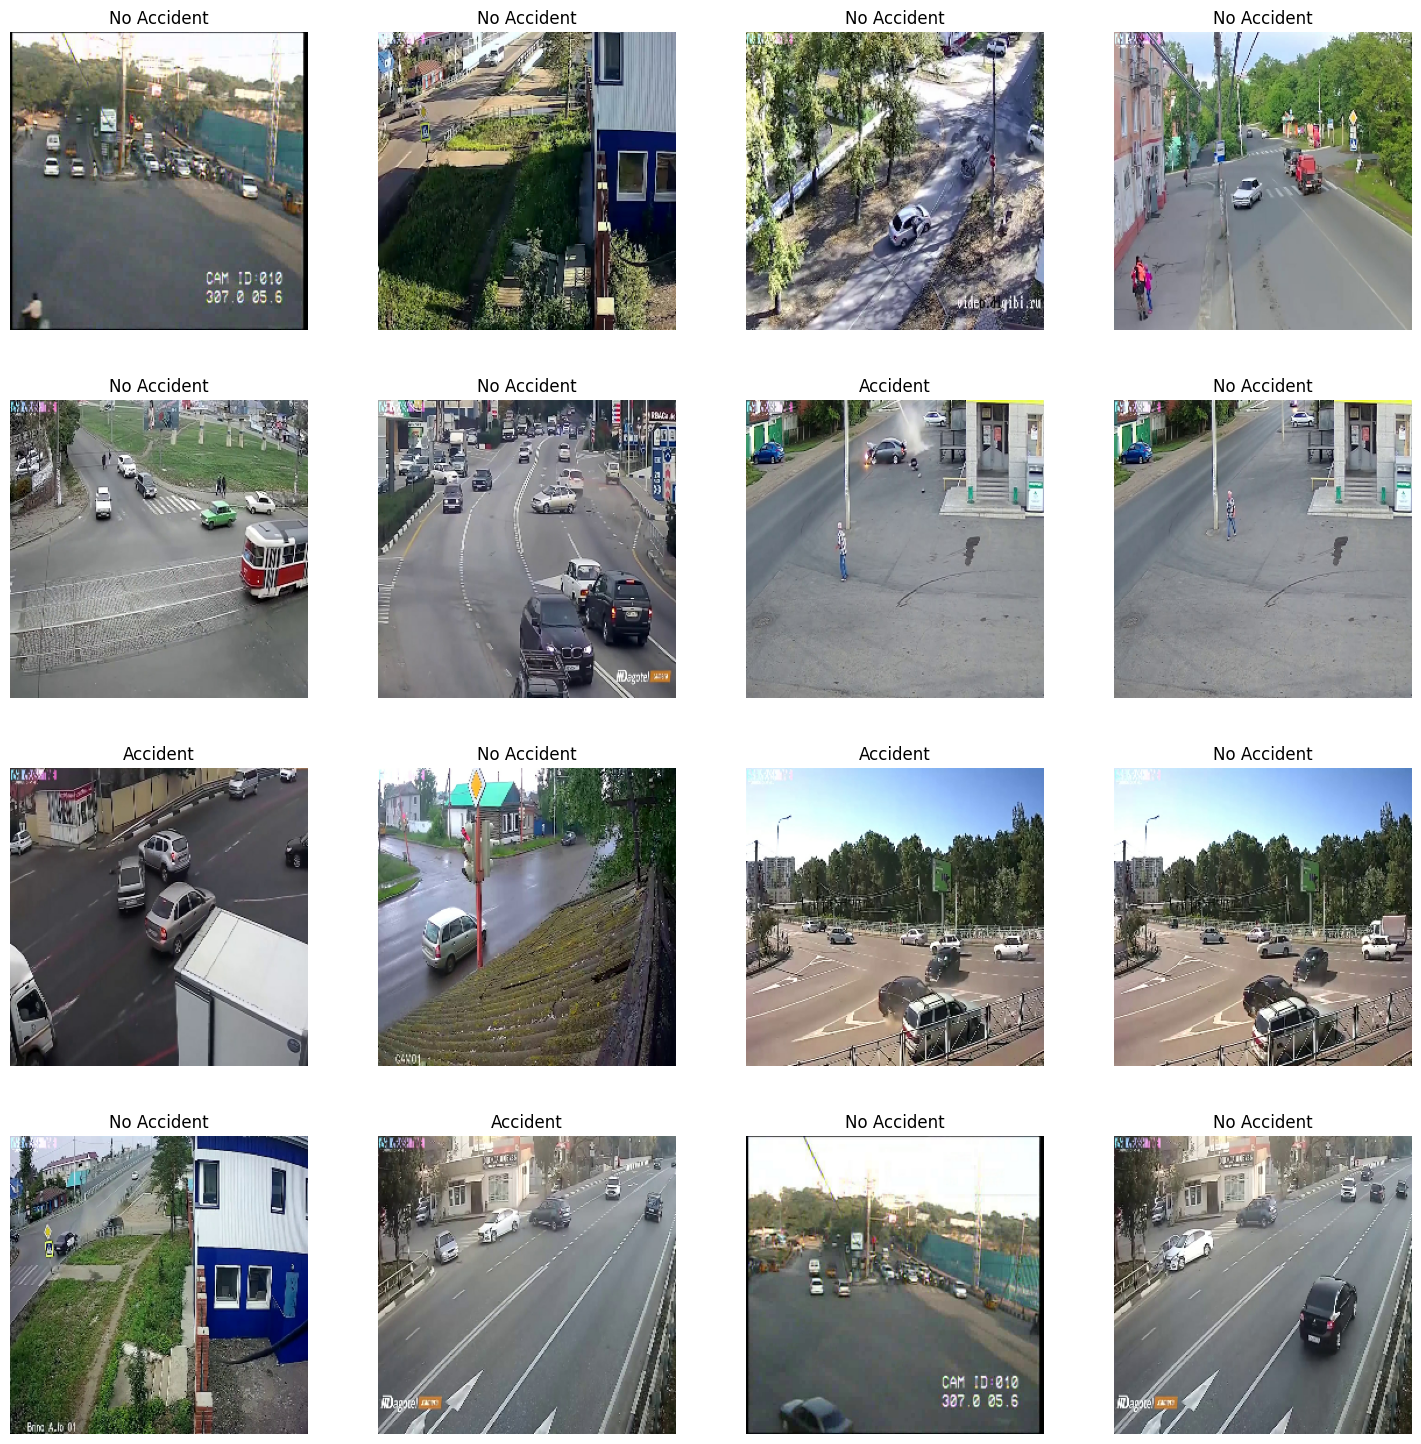

In [ ]:
#Plotting full batch of 32 images together

cols = 4
rows = 4
fig, ax = plt.subplots(nrows= rows , ncols= cols,figsize=(15,15),layout='constrained')
fig.tight_layout(pad=2)




for outer_index, img in enumerate(tr_batch[0][:]):
    if outer_index >= rows*cols:
        break

    if (outer_index % cols == 0):
        for inner_index, img in enumerate(tr_batch[0][outer_index:outer_index+cols]):


            ax[outer_index//cols][inner_index].imshow(img.astype(int))

            label = label_to_category(tr_batch[1][outer_index + inner_index])


            ax[outer_index//cols][inner_index].set_aspect(1)

            num_label = tr_batch[1][outer_index + inner_index]

            ax[outer_index//cols][inner_index].axis("off")
            ax[outer_index//cols][inner_index].title.set_text(label)


plt.savefig("test.png")
plt.show()




<h1>2. Preprocessing Data </h1>

In [ ]:
# Normalizing pixels value between between 0 & 1
tr_data = tr_data.map(lambda x,y: (x/255, y))


In [ ]:
tr_batch = tr_data.as_numpy_iterator().next()
#getting 32 normalized batch of images

In [ ]:
# Checking pixel min/max pixel values after normalization
print("Max pixel value : ",tr_batch[0].max())
print("Min pixel value : ",tr_batch[0].min())

Max pixel value :  1.0
Min pixel value :  0.0


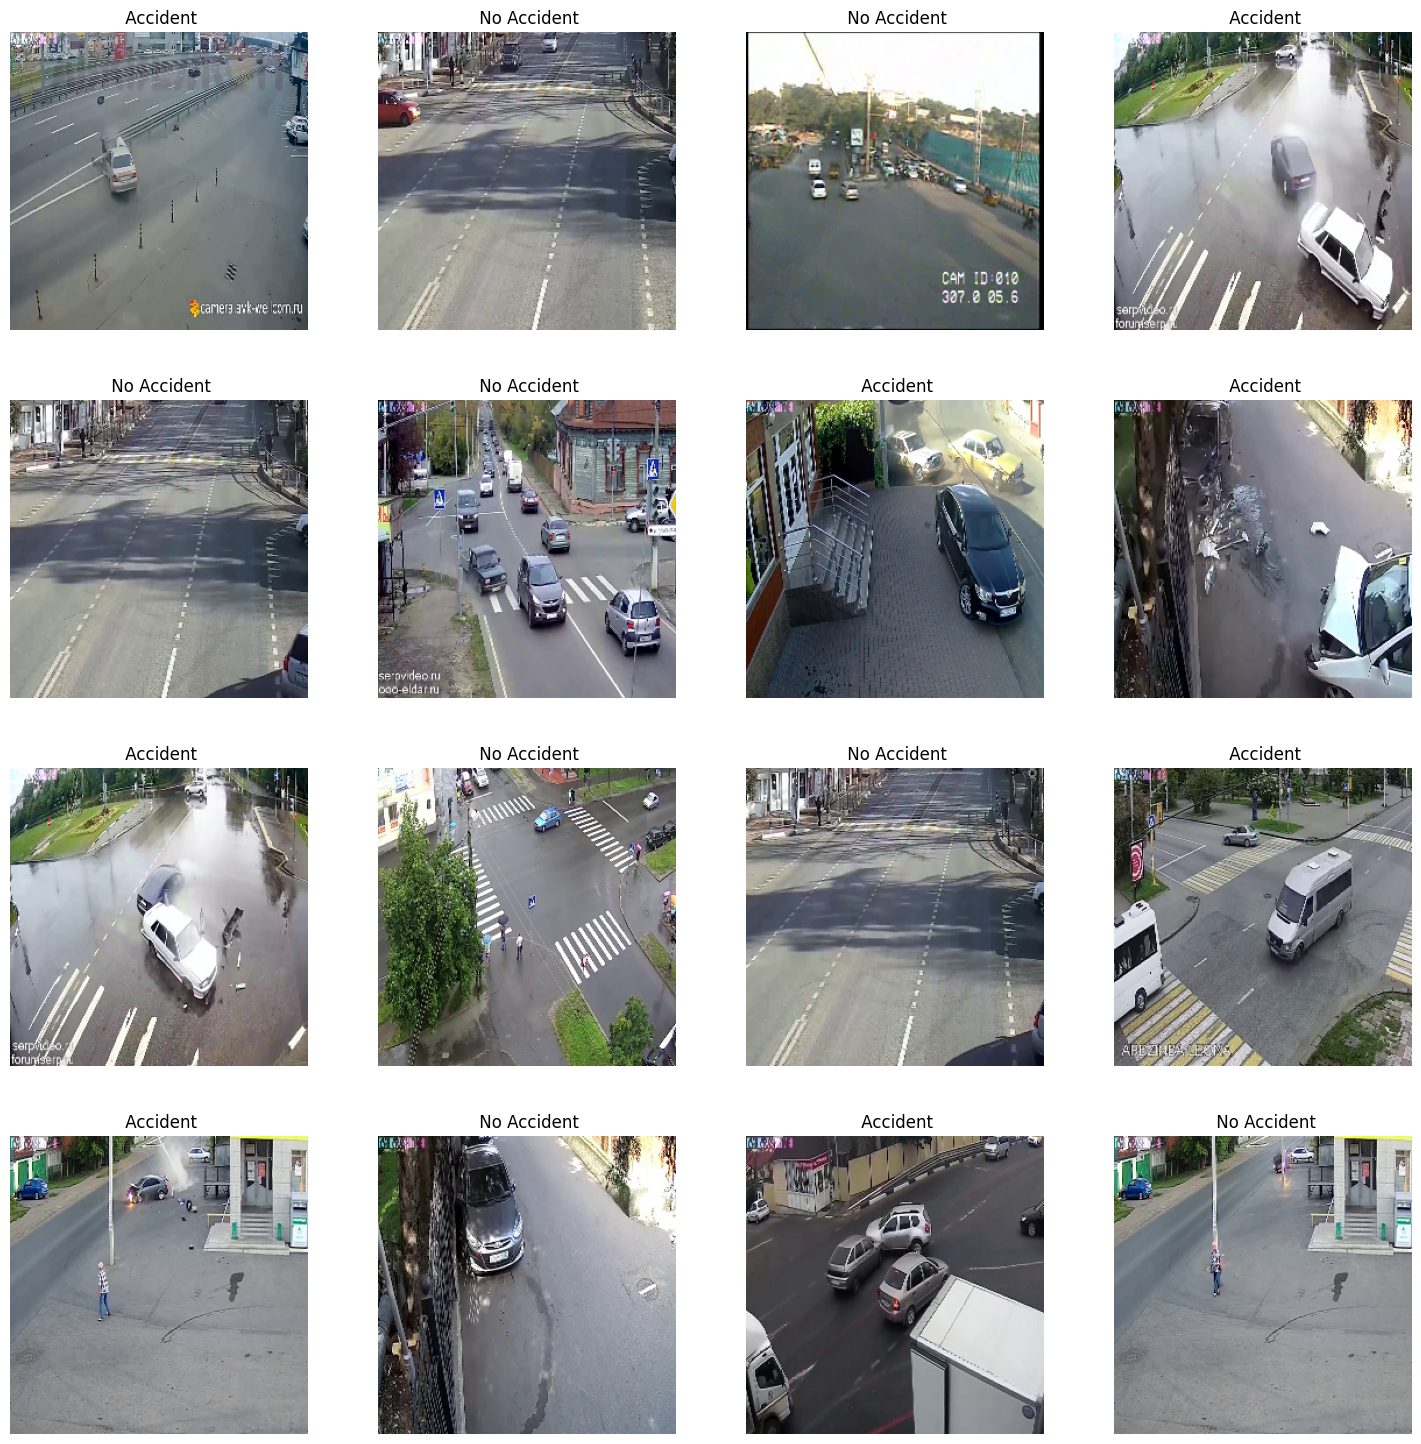

In [ ]:

#lets see training data after normalization

cols = 4
rows = 4
fig, ax = plt.subplots(nrows= rows , ncols= cols,figsize=(15,15),layout='constrained')
fig.tight_layout(pad=2)




for outer_index, img in enumerate(tr_batch[0][:]):
    if outer_index >= rows*cols:
        break

    if (outer_index % cols == 0):
        for inner_index, img in enumerate(tr_batch[0][outer_index:outer_index+cols]):


            ax[outer_index//cols][inner_index].imshow(img)
            if(tr_batch[1][outer_index + inner_index] == 0):
               label = " Accident"
            else: label = " No Accident"




            ax[outer_index//cols][inner_index].set_aspect(1)

            num_label = tr_batch[1][outer_index + inner_index]

            ax[outer_index//cols][inner_index].axis("off")
            ax[outer_index//cols][inner_index].title.set_text(label)


plt.savefig("test.png")
plt.show()



<h2>Loading Validation data for Hyper-parameter Turing</h2>

In [ ]:
val_data_dir = os.path.join("/content/drive/MyDrive/Project1/PJT DATASET/val")
val_data = tf.keras.utils.image_dataset_from_directory(val_data_dir)
val_data_iterator = val_data.as_numpy_iterator()
val_batch = val_data_iterator.next()

Found 108 files belonging to 2 classes.


In [ ]:
# Normalizing Validation data
val_data = val_data.map(lambda x,y: (x/255, y))
val_batch = val_data.as_numpy_iterator().next()

<h1> 3. Building CNN Architecture  </h1>


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
# Adding neural Layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

<h1> 4.  Training Neural Network </h1>

In [ ]:
# setting up for logging
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [ ]:
hist = model.fit(tr_data, epochs=20, validation_data=val_data, callbacks=[tensorboard_callback])
model.save("/content/drive/MyDrive/Project1/Coefficient/Accident.keras")

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.5519 - loss: 0.8775 - val_accuracy: 0.7037 - val_loss: 0.6288
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 30s 284ms/step - accuracy: 0.6852 - loss: 0.6312 - val_accuracy: 0.7037 - val_loss: 0.5676
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.7276 - loss: 0.5554 - val_accuracy: 0.7870 - val_loss: 0.4763
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 294ms/step - accuracy: 0.7800 - loss: 0.4650 - val_accuracy: 0.6944 - val_loss: 0.5381
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 327ms/step - accuracy: 0.8315 - loss: 0.3848 - val_accuracy: 0.8519 - val_loss: 0.3773
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 278ms/step - accuracy: 0.8539 - loss: 0.3163 - val_accuracy: 0.8796 - val_loss: 0.3421
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 254ms/step - accuracy: 0.8800 - loss: 0.3003 - val_accuracy: 0.8889 - val_loss: 0.2741
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 319ms/step - accuracy: 0.9169 - loss: 0.2055 - val_accuracy

In [ ]:
#hist.history

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras.applications import VGG16, MobileNetV2, ResNet50, ResNet152

In [ ]:
model_accuracies = {}

<h2>5.Seeing Training Loss and Accuracy Curve with epochs</h2>

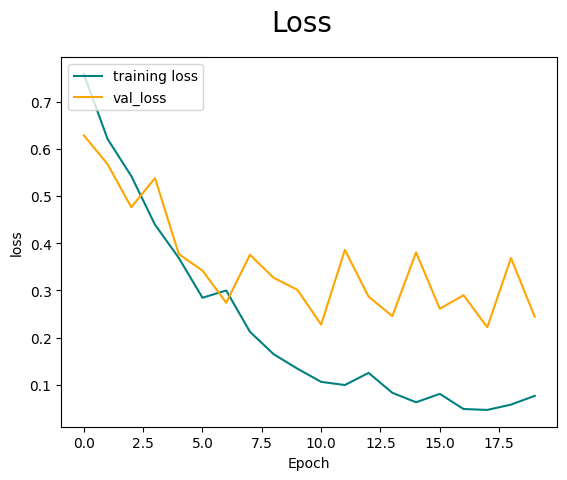

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='training loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()


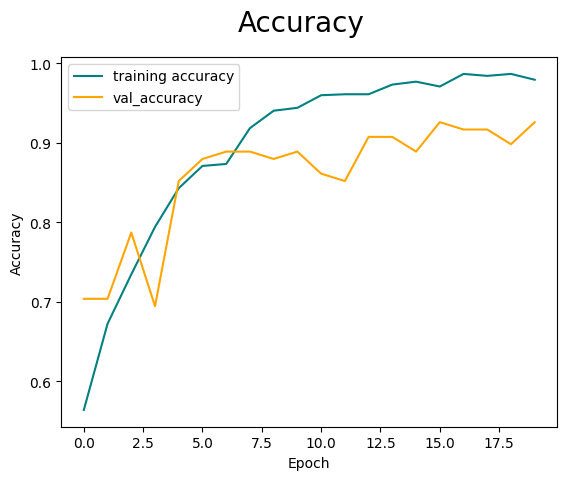

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='training accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


<h1>6. Evaluation</h1>

In [ ]:
test_data_dir = os.path.join("/content/drive/MyDrive/Project1/PJT DATASET/test")
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir)
test_data_iterator = test_data.as_numpy_iterator()
test_batch = test_data_iterator.next()

Found 110 files belonging to 2 classes.


In [ ]:

pre = tf.keras.metrics.Precision
re = tf.keras.metrics.Recall()

In [ ]:
pre = tf.keras.metrics.Precision()
re = tf.keras.metrics.Recall()

for batch in test_data:
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step


In [ ]:
def F1_score(precision, recall):
    return (2*precision*recall)/(precision+recall)

In [ ]:
print("Model achieved an precision score of {:5f}".format(pre.result()))
print("Model achieved an recall score of {:5f}".format(re.result()))

Model achieved an precision score of 0.896552
Model achieved an recall score of 0.981132


In [ ]:
f1_score = F1_score(pre.result(), re.result())
print("Model achieved an F1-score of {:5f}".format(f1_score))

Model achieved an F1-score of 0.936937


In [ ]:
loss, accuracy = model.evaluate(tr_data)
print(f"Accuracy Train Data: {accuracy * 100:.2f}%")

26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 319ms/step - accuracy: 0.9899 - loss: 0.0323
Accuracy: 99.15%


In [ ]:
loss, accuracy = model.evaluate(test_data)
print(f"Accuracy Test Data: {accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.9433 - loss: 39.7387
Accuracy Test Data: 93.64%


<h1> 7.Test just to see model working </h1>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/Project1/Coefficient/Accident.keras'
model = load_model(model_path)
flag=0

def predict_image(image_path, model):
    # Load and preprocess the image
    sample = cv2.imread(image_path, cv2.IMREAD_COLOR)
    sample = cv2.resize(sample, (256, 256))  # Adjust size as needed for your model
    sample = sample / 255.0  # Normalize pixel values to [0, 1]
    sample = sample.astype(np.float32)  # Convert to float32 to avoid depth error

    # Predict using the model
    prediction = 1 - model.predict(np.expand_dims(sample, axis=0))

    # Determine the label based on prediction
    if prediction >= 0.5:
        label = 'Predicted class is Accident'
        flag=1
    else:
        label = 'Predicted class is Not Accident'
        flag=0

    # Display the image with the prediction label
    plt.title(label)
    plt.imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.axis('off')  # Hide axis
    plt.show()

# Usage example
image_path = "/content/drive/MyDrive/Project1/PJT DATASET/train/Non Accident/5_25.jpg"  # Replace with your image path
predict_image(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


In [ ]:
# Usage example
image_path = "/content/drive/MyDrive/Project1/PJT DATASET/train/Non Accident/test13_5.jpg"  # Replace with your image path
predict_image(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [ ]:
# Usage example
image_path = "/content/drive/MyDrive/Project1/Severity Data/Minimum/images/image_1091.jpg"  # Replace with your image path
predict_image(image_path, model)

if flag==1:
  input_image = cv2.imread(image_path)  # Load the image as a numpy array
else:
  print("No Accident")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
No Accident


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


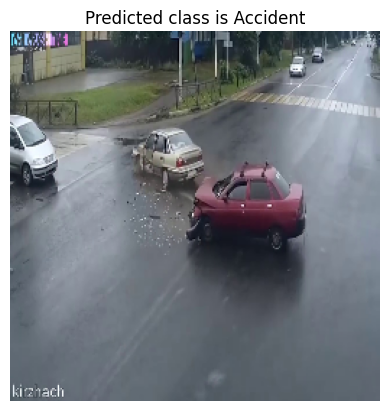

In [ ]:
# Usage example
image_path = "/content/drive/MyDrive/Project1/PJT DATASET/train/Accident/test16_29.jpg"  # Replace with your image path
predict_image(image_path, model)


Bounding Box Model - YOLOV5

In [ ]:
import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/Project1/Coefficient/best.pt')

def detect_objects(image):
    # Convert image to RGB format (required by YOLOv5 model)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Run the YOLO model inference
    results = model(rgb_image)

    # Extract bounding boxes and convert to a list
    bboxes = []
    for *box, conf, class_id in results.xyxy[0]:  # xyxy format: (x_min, y_min, x_max, y_max, confidence, class)
        bboxes.append([int(box[0]), int(box[1]), int(box[2]), int(box[3])])

    # Return the original image and the list of bounding box coordinates
    return image, bboxes

# Example usage:
original_image, bounding_boxes = detect_objects(input_image)

# Display results
if not bounding_boxes:
    print("No objects detected in the image.")
else:
    print("Bounding Boxes:", bounding_boxes)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-5 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Bounding Boxes: [[271, 204, 507, 640]]


Display Bounding Box

In [ ]:
# Draw bounding boxes if any were detected
def draw_bounding_boxes(image, bboxes):
    # Copy the image to avoid modifying the original
    image_with_boxes = image.copy()

    # Iterate through each bounding box and draw it on the image
    for bbox in bboxes:
        x_min, y_min, x_max, y_max = bbox
        # Draw a rectangle with a green border and 2-pixel thickness
        cv2.rectangle(image_with_boxes, (x_min, y_min), (x_max, y_max), color=(0, 255, 0), thickness=2)

    return image_with_boxes

if bounding_boxes:
    image_with_boxes = draw_bounding_boxes(original_image, bounding_boxes)

    # Convert the image to RGB for display with matplotlib
    image_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

Cropping The Image

In [ ]:
def crop_bounding_box(image, bounding_box):
    # Extract the bounding box coordinates
    x_min, y_min, x_max, y_max = bounding_box

    # Crop the image using the bounding box
    cropped_image = image[y_min:y_max, x_min:x_max]

    return cropped_image

# Example usage

# Crop the bounding box from the image
cropped_image = crop_bounding_box(input_image, bounding_boxes[0])

# Display the cropped image
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Cropped Bounding Box")
plt.show()


SEVERITY DETECTION MODEL

In [ ]:
from tensorflow.keras.models import load_model

categories = ['Intense', 'Medium', 'Minimum']

# Load the trained model
model = load_model('/content/drive/MyDrive/Project1/Coefficient/best_severity_classification_model.keras')

def predict_severity_class(cropped_img, model):
    # Preprocess cropped image for prediction
    cropped_img = cv2.resize(cropped_img, (64, 64))  # Resize to the model's input size
    cropped_img = cropped_img / 255.0  # Normalize pixel values
    cropped_img = np.expand_dims(cropped_img, axis=0)  # Add batch dimension

    # Predict class probabilities
    predictions = model.predict(cropped_img)
    class_index = np.argmax(predictions, axis=1)[0]  # Get index of the highest probability
    return categories[class_index]

# Example usage
# Assuming you have already cropped the image and stored it in `cropped_image`
# cropped_image = ... (this should be your input cropped image as a numpy array)

predicted_class_index = predict_severity_class(cropped_image, model)
print(f"The predicted class index for the cropped region is: {predicted_class_index}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
The predicted class index for the cropped region is: Medium
